In [18]:
import numpy as np
import random
import math
import spectra
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns; sns.set()

In [34]:
plate=pd.read_excel("1",index_col=0)
first=pd.read_csv("2.5h.csv")
sample=[]
time=[]
for well in plate.itertuples():
    for entry in well[1:]:
        
        entry=entry.split(' ')
        if "PBS" in entry:
            sample.extend(["PBS" for x in range(30)])
            time.extend([time[-1] for x in range(30)])
        else:
            sample.extend([entry[0] for x in range(30)])
            time.extend([entry[1] for x in range(30)])
first['Pulse_Size']=sample
first['Time_Point']=time
gfp_quarter=first.loc[(first.Gate=="mCherry-/GFP+") & (first.Pulse_Size=="0.25")].groupby("Time_Point")["Count"].mean()
mCherry_quarter=first.loc[(first.Gate=="mCherry+/GFP-") & (first.Pulse_Size=="0.25")].groupby("Time_Point")["Count"].mean()
gfp_half=first.loc[(first.Gate=="mCherry-/GFP+") & (first.Pulse_Size=="0.5")].groupby("Time_Point")["Count"].mean()
mCherry_half=first.loc[(first.Gate=="mCherry+/GFP-") & (first.Pulse_Size=="0.5")].groupby("Time_Point")["Count"].mean()
gfp_full=first.loc[(first.Gate=="mCherry-/GFP+") & (first.Pulse_Size=="1")].groupby("Time_Point")["Count"].mean()
mCherry_full=first.loc[(first.Gate=="mCherry+/GFP-") & (first.Pulse_Size=="1")].groupby("Time_Point")["Count"].mean()
gfp_double=first.loc[(first.Gate=="mCherry-/GFP+") & (first.Pulse_Size=="2")].groupby("Time_Point")["Count"].mean()
mCherry_double=first.loc[(first.Gate=="mCherry+/GFP-") & (first.Pulse_Size=="2")].groupby("Time_Point")["Count"].mean()
#standard deviations 
gfp_quarter_std=first.loc[(first.Gate=="mCherry-/GFP+") & (first.Pulse_Size=="0.25")].groupby("Time_Point")["Count"].std()
mCherry_quarter_std=first.loc[(first.Gate=="mCherry+/GFP-") & (first.Pulse_Size=="0.25")].groupby("Time_Point")["Count"].std()
gfp_half_std=first.loc[(first.Gate=="mCherry-/GFP+") & (first.Pulse_Size=="0.5")].groupby("Time_Point")["Count"].std()
mCherry_half_std=first.loc[(first.Gate=="mCherry+/GFP-") & (first.Pulse_Size=="0.5")].groupby("Time_Point")["Count"].std()
gfp_full_std=first.loc[(first.Gate=="mCherry-/GFP+") & (first.Pulse_Size=="1")].groupby("Time_Point")["Count"].std()
mCherry_full_std=first.loc[(first.Gate=="mCherry+/GFP-") & (first.Pulse_Size=="1")].groupby("Time_Point")["Count"].std()
gfp_double_std=first.loc[(first.Gate=="mCherry-/GFP+") & (first.Pulse_Size=="2")].groupby("Time_Point")["Count"].std()
mCherry_double_std=first.loc[(first.Gate=="mCherry+/GFP-") & (first.Pulse_Size=="2")].groupby("Time_Point")["Count"].std()



In [35]:
raw_dog = pd.concat([gfp_quarter,mCherry_quarter,gfp_half,mCherry_half,gfp_full,mCherry_full,gfp_double,mCherry_double],axis=1)
standard_1=pd.concat([gfp_quarter_std,mCherry_quarter_std,gfp_half_std,mCherry_half_std,gfp_full_std,mCherry_full_std,gfp_double_std,mCherry_double_std],axis=1)
standard_1.columns=['0.25 GFP','0.25 mCherry','0.5 GFP','0.5 mCherry','1 GFP','1 mCherry','2 GFP','2 mCherry']
raw_dog.columns=['0.25 GFP','0.25 mCherry','0.5 GFP','0.5 mCherry','1 GFP','1 mCherry','2 GFP','2 mCherry']


In [36]:
plate2=pd.read_excel("5h_plate.xlsx",index_col=0)
second=pd.read_csv("5.5.csv")
sample=[]
time=[]
for well in plate2.itertuples():
    for entry in well[1:]:
        
        entry=entry.split(' ')
        if "PBS" in entry:
            sample.extend(["PBS" for x in range(30)])
            time.extend([time[-1] for x in range(30)])
        else:
            sample.extend([entry[0] for x in range(30)])
            time.extend([entry[1] for x in range(30)])
second['Pulse_Size']=sample
second['Time_Point']=time
gfp_quarter=second.loc[(second.Gate=="mCherry-/GFP+") & (second.Pulse_Size=="0.25")].groupby("Time_Point")["Count"].mean()
mCherry_quarter=second.loc[(second.Gate=="mCherry+/GFP-") & (second.Pulse_Size=="0.25")].groupby("Time_Point")["Count"].mean()
gfp_half=second.loc[(second.Gate=="mCherry-/GFP+") & (second.Pulse_Size=="0.5")].groupby("Time_Point")["Count"].mean()
mCherry_half=second.loc[(second.Gate=="mCherry+/GFP-") & (second.Pulse_Size=="0.5")].groupby("Time_Point")["Count"].mean()
gfp_full=second.loc[(second.Gate=="mCherry-/GFP+") & (second.Pulse_Size=="1")].groupby("Time_Point")["Count"].mean()
mCherry_full=second.loc[(first.Gate=="mCherry+/GFP-") & (second.Pulse_Size=="1")].groupby("Time_Point")["Count"].mean()
gfp_double=second.loc[(first.Gate=="mCherry-/GFP+") & (second.Pulse_Size=="2")].groupby("Time_Point")["Count"].mean()
mCherry_double=second.loc[(first.Gate=="mCherry+/GFP-") & (second.Pulse_Size=="2")].groupby("Time_Point")["Count"].mean()
#standard deviation 

gfp_quarter_std=second.loc[(second.Gate=="mCherry-/GFP+") & (second.Pulse_Size=="0.25")].groupby("Time_Point")["Count"].std()
mCherry_quarter_std=second.loc[(second.Gate=="mCherry+/GFP-") & (second.Pulse_Size=="0.25")].groupby("Time_Point")["Count"].std()
gfp_half_std=second.loc[(second.Gate=="mCherry-/GFP+") & (second.Pulse_Size=="0.5")].groupby("Time_Point")["Count"].std()
mCherry_half_std=second.loc[(second.Gate=="mCherry+/GFP-") & (second.Pulse_Size=="0.5")].groupby("Time_Point")["Count"].std()
gfp_full_std=second.loc[(second.Gate=="mCherry-/GFP+") & (second.Pulse_Size=="1")].groupby("Time_Point")["Count"].std()
mCherry_full_std=second.loc[(first.Gate=="mCherry+/GFP-") & (second.Pulse_Size=="1")].groupby("Time_Point")["Count"].std()
gfp_double_std=second.loc[(first.Gate=="mCherry-/GFP+") & (second.Pulse_Size=="2")].groupby("Time_Point")["Count"].std()
mCherry_double_std=second.loc[(first.Gate=="mCherry+/GFP-") & (second.Pulse_Size=="2")].groupby("Time_Point")["Count"].std()



In [37]:
raw_dog2 = pd.concat([gfp_quarter,mCherry_quarter,gfp_half,mCherry_half,gfp_full,mCherry_full,gfp_double,mCherry_double],axis=1)
raw_dog2.columns=raw_dog.columns=['0.25 GFP','0.25 mCherry','0.5 GFP','0.5 mCherry','1 GFP','1 mCherry','2 GFP','2 mCherry']
standard_2=pd.concat([gfp_quarter_std,mCherry_quarter_std,gfp_half_std,mCherry_half_std,gfp_full_std,mCherry_full_std,gfp_double_std,mCherry_double_std],axis=1)
standard_2.columns=['0.25 GFP','0.25 mCherry','0.5 GFP','0.5 mCherry','1 GFP','1 mCherry','2 GFP','2 mCherry']



In [38]:
plate3=pd.read_excel("6h_plate.xlsx",index_col=0)
third=pd.read_csv("7h.csv")
sample=[]
time=[]
for well in plate3.itertuples():
    for entry in well[1:]:
        
        entry=entry.split(' ')
        if "PBS" in entry:
            sample.extend(["PBS" for x in range(30)])
            time.extend([time[-1] for x in range(30)])
        else:
            sample.extend([entry[0] for x in range(30)])
            time.extend([entry[1] for x in range(30)])
third['Pulse_Size']=sample
third['Time_Point']=time
gfp_quarter=third.loc[(third.Gate=="mCherry-/GFP+") & (third.Pulse_Size=="0.25")].groupby("Time_Point")["Count"].mean()
mCherry_quarter=third.loc[(third.Gate=="mCherry+/GFP-") & (third.Pulse_Size=="0.25")].groupby("Time_Point")["Count"].mean()
gfp_half=third.loc[(third.Gate=="mCherry-/GFP+") & (third.Pulse_Size=="0.5")].groupby("Time_Point")["Count"].mean()
mCherry_half=third.loc[(third.Gate=="mCherry+/GFP-") & (third.Pulse_Size=="0.5")].groupby("Time_Point")["Count"].mean()
gfp_full=third.loc[(third.Gate=="mCherry-/GFP+") & (third.Pulse_Size=="1")].groupby("Time_Point")["Count"].mean()
mCherry_full=third.loc[(third.Gate=="mCherry+/GFP-") & (third.Pulse_Size=="1")].groupby("Time_Point")["Count"].mean()
gfp_double=third.loc[(third.Gate=="mCherry-/GFP+") & (third.Pulse_Size=="2")].groupby("Time_Point")["Count"].mean()
mCherry_double=third.loc[(third.Gate=="mCherry+/GFP-") & (third.Pulse_Size=="2")].groupby("Time_Point")["Count"].mean()
#Standard Deviation
gfp_quarter_std=third.loc[(third.Gate=="mCherry-/GFP+") & (third.Pulse_Size=="0.25")].groupby("Time_Point")["Count"].std()
mCherry_quarter_std=third.loc[(third.Gate=="mCherry+/GFP-") & (third.Pulse_Size=="0.25")].groupby("Time_Point")["Count"].std()
gfp_half_std=third.loc[(third.Gate=="mCherry-/GFP+") & (third.Pulse_Size=="0.5")].groupby("Time_Point")["Count"].std()
mCherry_half_std=third.loc[(third.Gate=="mCherry+/GFP-") & (third.Pulse_Size=="0.5")].groupby("Time_Point")["Count"].std()
gfp_full_std=third.loc[(third.Gate=="mCherry-/GFP+") & (third.Pulse_Size=="1")].groupby("Time_Point")["Count"].std()
mCherry_full_std=third.loc[(third.Gate=="mCherry+/GFP-") & (third.Pulse_Size=="1")].groupby("Time_Point")["Count"].std()
gfp_double_std=third.loc[(third.Gate=="mCherry-/GFP+") & (third.Pulse_Size=="2")].groupby("Time_Point")["Count"].std()
mCherry_double_std=third.loc[(third.Gate=="mCherry+/GFP-") & (third.Pulse_Size=="2")].groupby("Time_Point")["Count"].std()



In [95]:
raw_dog3 = pd.concat([gfp_quarter,mCherry_quarter,gfp_half,mCherry_half,gfp_full,mCherry_full,gfp_double,mCherry_double],axis=1)
raw_dog3.columns=raw_dog.columns=['0.25 GFP','0.25 mCherry','0.5 GFP','0.5 mCherry','1 GFP','1 mCherry','2 GFP','2 mCherry']
standard_3=pd.concat([gfp_quarter_std,mCherry_quarter_std,gfp_half_std,mCherry_half_std,gfp_full_std,mCherry_full_std,gfp_double_std,mCherry_double_std],axis=1)
standard_3.columns=['0.25 GFP','0.25 mCherry','0.5 GFP','0.5 mCherry','1 GFP','1 mCherry','2 GFP','2 mCherry']
total_standard=pd.concat([standard_1,standard_2,standard_3])

h7=pd.concat([raw_dog,raw_dog2,raw_dog3])
h7["0.25 GFP frac"]=h7['0.25 GFP']/(h7['0.25 GFP']+h7['0.25 mCherry'])
h7["max 0.25 GFP frac"]=(h7['0.25 GFP']+total_standard['0.25 GFP'])/(h7['0.25 GFP']+h7['0.25 mCherry'])
h7["min 0.25 GFP frac"]=(h7['0.25 GFP']-total_standard['0.25 GFP'])/(h7['0.25 GFP']+h7['0.25 mCherry'])
h7["0.5 GFP frac"]=h7['0.5 GFP']/(h7['0.5 GFP']+h7['0.5 mCherry'])
h7["max 0.5 GFP frac"]=(h7['0.5 GFP']+total_standard['0.5 GFP'])/(h7['0.5 GFP']+h7['0.5 mCherry'])
h7["min 0.5 GFP frac"]=(h7['0.5 GFP']-total_standard['0.5 GFP'])/(h7['0.5 GFP']+h7['0.5 mCherry'])
h7["1 GFP frac"]=h7['1 GFP']/(h7['1 GFP']+h7['1 mCherry'])
h7["max 1 GFP frac"]=(h7['1 GFP']+total_standard['1 GFP'])/(h7['1 GFP']+h7['1 mCherry'])
h7["min 1 GFP frac"]=(h7['1 GFP']-total_standard['1 GFP'])/(h7['1 GFP']+h7['1 mCherry'])
h7["2 GFP frac"]=h7['2 GFP']/(h7['2 GFP']+h7['2 mCherry'])
h7["max 2 GFP frac"]=np.minimum((h7['2 GFP']+total_standard['2 GFP'])/(h7['2 GFP']+h7['2 mCherry']),1)
h7["min 2 GFP frac"]=np.maximum((h7['2 GFP']-total_standard['2 GFP'])/(h7['2 GFP']+h7['2 mCherry']),0)
frac=h7[h7.columns[-12:]]
h7=h7[h7.columns[:-12]]


frac["0.25 mCherry frac"]=1-frac["0.25 GFP frac"]
frac["min 0.25 mCherry"]=1-frac["max 0.25 GFP frac"]
frac["max 0.25 mCherry"]=1-frac["min 0.25 GFP frac"]
frac["0.5 mCherry frac"]=1-frac["0.5 GFP frac"]
frac["min 0.5 mCherry"]=1-frac["max 0.5 GFP frac"]
frac["max 0.5 mCherry"]=1-frac["min 0.5 GFP frac"]
frac["1 mCherry frac"]=1-frac["1 GFP frac"]
frac["min 1 mCherry"]=1-frac["max 1 GFP frac"]
frac["max 1 mCherry"]=1-frac["min 1 GFP frac"]
frac["2 mCherry frac"]=1-frac["2 GFP frac"]
frac["min 2 mCherry"]=1-frac["max 2 GFP frac"]
frac["max 2 mCherry"]=1-frac["min 2 GFP frac"]
frac


,0.25 GFP frac,max 0.25 GFP frac,min 0.25 GFP frac,0.5 GFP frac,max 0.5 GFP frac,min 0.5 GFP frac,1 GFP frac,max 1 GFP frac,min 1 GFP frac,2 GFP frac,...,max 0.25 mCherry,0.5 mCherry frac,min 0.5 mCherry,max 0.5 mCherry,1 mCherry frac,min 1 mCherry,max 1 mCherry,2 mCherry frac,min 2 mCherry,max 2 mCherry
Time_Point,,,,,,,,,,,,,,,,,,,,,
0,0.053476,0.069490,0.037462,0.154590,0.164199,0.144981,0.276887,0.281280,0.272495,0.359874,...,0.962538,0.845410,0.835801,0.855019,0.723113,0.718720,0.727505,0.640126,0.605969,0.674283
0.5,0.058199,0.064669,0.051728,0.150522,0.171749,0.129296,0.268951,0.306738,0.231164,0.331408,...,0.948272,0.849478,0.828251,0.870704,0.731049,0.693262,0.768836,0.668592,0.647945,0.689238
1,0.055201,0.058634,0.051768,0.145543,0.149201,0.141884,0.266599,0.275272,0.257925,0.336804,...,0.948232,0.854457,0.850799,0.858116,0.733401,0.724728,0.742075,0.663196,0.591510,0.734882
1.5,0.054132,0.059043,0.049221,0.143522,0.152331,0.134713,0.261632,0.310675,0.212588,0.331178,...,0.950779,0.856478,0.847669,0.865287,0.738368,0.689325,0.787412,0.668822,0.598840,0.738803
2,0.106027,0.219601,-0.007547,0.263645,0.532653,-0.005364,0.406548,0.802736,0.010360,0.567751,...,1.007547,0.736355,0.467347,1.005364,0.593452,0.197264,0.989640,0.432249,0.000000,1.000000
2.5,0.107283,0.139428,0.075138,0.249889,0.422763,0.077015,0.418248,0.644780,0.191716,0.541554,...,0.924862,0.750111,0.577237,0.922985,0.581752,0.355220,0.808284,0.458446,0.391753,0.525139
3,0.134582,0.144622,0.124542,0.314219,0.320986,0.307452,0.460804,0.557480,0.364129,0.580744,...,0.875458,0.685781,0.679014,0.692548,0.539196,0.442520,0.635871,0.419256,0.372680,0.465833
3.5,0.192081,0.268238,0.115925,0.387464,0.424023,0.350905,0.561421,0.649923,0.472918,0.747898,...,0.884075,0.612536,0.575977,0.649095,0.438579,0.350077,0.527082,0.252102,0.086218,0.417987
4,0.181487,0.244875,0.118100,0.368704,0.487244,0.250164,0.547599,0.652278,0.442919,0.745119,...,0.881900,0.631296,0.512756,0.749836,0.452401,0.347722,0.557081,0.254881,0.000000,0.526136


In [83]:
total_standard

,0.25 GFP,0.25 mCherry,0.5 GFP,0.5 mCherry,1 GFP,1 mCherry,2 GFP,2 mCherry
Time_Point,,,,,,,,
0,416.795613,6586.950186,381.382026,1956.180739,198.464103,879.479818,1681.020697,2676.201148
0.5,261.164220,5949.069934,997.110868,5848.589125,2044.048943,4869.478745,1281.119270,560.628442
1,168.960301,3229.814662,228.278521,1742.430223,623.977363,1368.993335,5552.588518,8522.893537
1.5,342.097939,3658.041154,739.636622,5279.266339,8949.719605,23776.024738,20574.850724,35890.976782
2,4984.934662,42285.463851,16307.824122,44968.690342,53493.558924,80324.078895,212387.513532,159145.145829
2.5,1968.358220,17610.643134,15593.364136,48761.408651,49212.957860,68550.516281,13896.111003,17965.372424
3,120.403488,1696.749343,154.476535,2560.420083,2532.663420,4423.486672,1788.604577,1720.611229
3.5,1056.622449,4494.110071,649.348135,1176.566332,2263.459594,2513.274822,8114.290871,1917.132320
4,824.730461,4033.782385,2984.951814,5962.784696,3647.044465,3366.556302,16570.251215,4615.915835


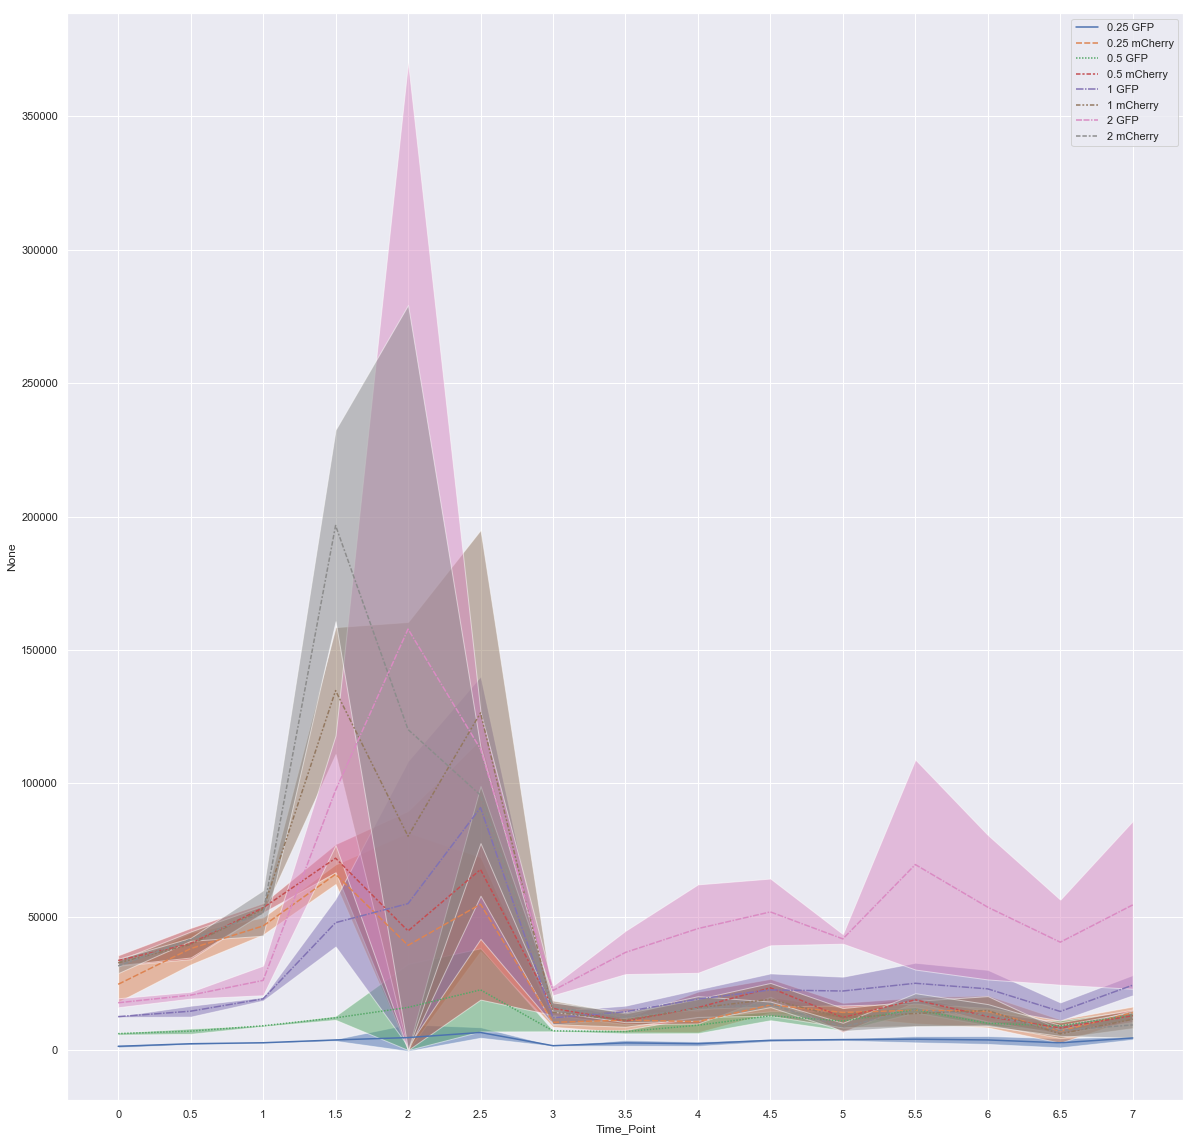

In [84]:
fig,ax=plt.subplots(figsize=(20,20))

sns.lineplot(data=h7)

ax.fill_between(h7.index,y1=h7["0.25 GFP"]-total_standard["0.25 GFP"],y2=h7["0.25 GFP"]+total_standard["0.25 GFP"],alpha=0.5)
ax.fill_between(h7.index,y1=np.maximum(h7["0.25 mCherry"]-total_standard["0.25 mCherry"],0),y2=h7["0.25 mCherry"]+total_standard["0.25 mCherry"],alpha=0.5)

ax.fill_between(h7.index,y1=np.maximum(h7["0.5 GFP"]-total_standard["0.5 GFP"],0),y2=h7["0.5 GFP"]+total_standard["0.5 GFP"],alpha=0.5)
ax.fill_between(h7.index,y1=np.maximum(h7["0.5 mCherry"]-total_standard["0.5 mCherry"],0),y2=h7["0.5 mCherry"]+total_standard["0.5 mCherry"],alpha=0.5)

ax.fill_between(h7.index,y1=np.maximum(h7["1 GFP"]-total_standard["1 GFP"],0),y2=h7["1 GFP"]+total_standard["1 GFP"],alpha=0.5)
ax.fill_between(h7.index,y1=np.maximum(h7["1 mCherry"]-total_standard["1 mCherry"],0),y2=h7["1 mCherry"]+total_standard["1 mCherry"],alpha=0.5)

ax.fill_between(h7.index,y1=np.maximum(h7["2 GFP"]-total_standard["2 GFP"],0),y2=h7["2 GFP"]+total_standard["2 GFP"],alpha=0.5)
ax.fill_between(h7.index,y1=np.maximum(h7["2 mCherry"]-total_standard["2 mCherry"],0),y2=h7["2 mCherry"]+total_standard["2 mCherry"],alpha=0.5)

Text(0.5,0,'Time(h)')

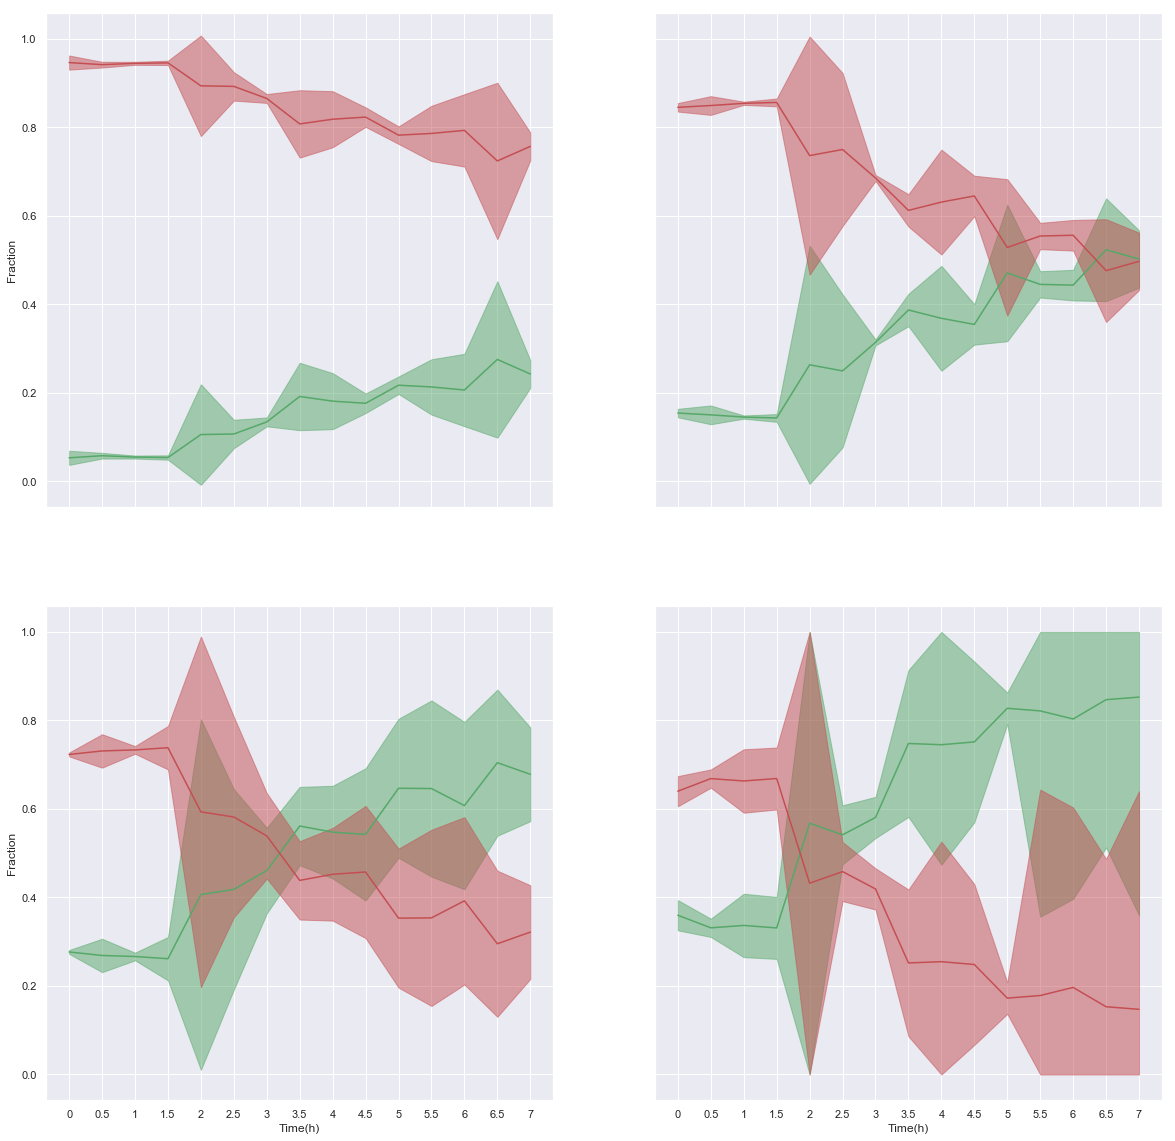

In [102]:
fig,ax=plt.subplots(2,2,figsize=(20,20),sharex=True,sharey=True)
sns.lineplot(data=frac,x=frac.index,y=frac["0.25 GFP frac"],ax=ax[0][0],color='g')
ax[0][0].fill_between(frac.index,y1=frac["min 0.25 GFP frac"],y2=frac["max 0.25 GFP frac"],alpha=0.5,color='g')
sns.lineplot(data=frac,x=frac.index,y=frac["0.25 mCherry frac"],ax=ax[0][0],color='r')
ax[0][0].fill_between(frac.index,y1=frac["min 0.25 mCherry"],y2=frac["max 0.25 mCherry"],alpha=0.5,color='r')

sns.lineplot(data=frac,x=frac.index,y=frac["0.5 GFP frac"],ax=ax[0][1],color='g')
ax[0][1].fill_between(frac.index,y1=frac["min 0.5 GFP frac"],y2=frac["max 0.5 GFP frac"],alpha=0.5,color='g')
sns.lineplot(data=frac,x=frac.index,y=frac["0.5 mCherry frac"],ax=ax[0][1],color='r')
ax[0][1].fill_between(frac.index,y1=frac["min 0.5 mCherry"],y2=frac["max 0.5 mCherry"],alpha=0.5,color='r')

sns.lineplot(data=frac,x=frac.index,y=frac["1 GFP frac"],ax=ax[1][0],color='g')
ax[1][0].fill_between(frac.index,y1=frac["min 1 GFP frac"],y2=frac["max 1 GFP frac"],alpha=0.5,color='g')
sns.lineplot(data=frac,x=frac.index,y=frac["1 mCherry frac"],ax=ax[1][0],color='r')
ax[1][0].fill_between(frac.index,y1=frac["min 1 mCherry"],y2=frac["max 1 mCherry"],alpha=0.5,color='r')

sns.lineplot(data=frac,x=frac.index,y=frac["2 GFP frac"],ax=ax[1][1],color='g')
ax[1][1].fill_between(frac.index,y1=frac["min 2 GFP frac"],y2=frac["max 2 GFP frac"],alpha=0.5,color='g')

sns.lineplot(data=frac,x=frac.index,y=frac["2 mCherry frac"],ax=ax[1][1],color='r')
ax[1][1].fill_between(frac.index,y1=frac["min 2 mCherry"],y2=frac["max 2 mCherry"],alpha=0.5,color='r')

ax[0][0].set_ylabel("Fraction")
ax[1][0].set_ylabel("Fraction")
ax[1][0].set_xlabel("Time(h)")
ax[1][1].set_xlabel('Time(h)')